In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
import numpy as np
from sklearn import tree


In [142]:
red = pd.read_csv('data/wine-quality-red.csv')
red['is_red'] = 1
white = pd.read_csv('data/wine-quality-white.csv')
white['is_red'] = 0


white.head()



data = pd.concat([red,white])
data.to_csv('data/wine-quality.csv', index=False)

data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,True
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,True
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,True
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,True



Splitting data into training / test allows me to test the accuracy of my model on unseend data.

this split is random however to mainatin class raitios i have used stratisfied sampling.

random state = 1 allows randomisation to remain deterministic, this ensures that test data dos not bleed into the training data

In [143]:
from sklearn import preprocessing


X = data.drop(['quality'], axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,  random_state=1)
print(X_train.shape, y_train.shape)


min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)





(5197, 12) (5197,)


In [162]:
regr = MLPRegressor(random_state=1, max_iter=700,
                    activation="relu",
                    hidden_layer_sizes=(100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
                                        100, 100, 100, 100),
                    verbose=True).fit(X_train, y_train)


# clf = MLPClassifier(random_state=1, max_iter=700,
#                     activation="relu",
#                     hidden_layer_sizes=(50, 100, 100, 100, 500 ),
#                     verbose=True).fit(X_train, y_train)





Iteration 1, loss = 7.76647244
Iteration 2, loss = 0.50591578
Iteration 3, loss = 0.39213170
Iteration 4, loss = 0.38789344
Iteration 5, loss = 0.37726710
Iteration 6, loss = 0.31618685
Iteration 7, loss = 0.30092807
Iteration 8, loss = 0.28536366
Iteration 9, loss = 0.27482834
Iteration 10, loss = 0.27546844
Iteration 11, loss = 0.26811263
Iteration 12, loss = 0.26354613
Iteration 13, loss = 0.26038581
Iteration 14, loss = 0.26549733
Iteration 15, loss = 0.26081503
Iteration 16, loss = 0.25788728
Iteration 17, loss = 0.25528783
Iteration 18, loss = 0.25138120
Iteration 19, loss = 0.25410949
Iteration 20, loss = 0.25276696
Iteration 21, loss = 0.24972027
Iteration 22, loss = 0.24342082
Iteration 23, loss = 0.24299693
Iteration 24, loss = 0.24478162
Iteration 25, loss = 0.24300473
Iteration 26, loss = 0.23961640
Iteration 27, loss = 0.24712511
Iteration 28, loss = 0.25452308
Iteration 29, loss = 0.24182170
Iteration 30, loss = 0.23994813
Iteration 31, loss = 0.23251941
Iteration 32, los

In [137]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev


Multiclass classification requires One verses Rest in order to compare ROC_AUC 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[[0.29824561 0.16       0.34939759 ... 0.21641791 0.2        0.        ]
 [0.13157895 0.10666667 0.28313253 ... 0.15671642 0.28888889 0.        ]
 [0.29824561 0.18666667 0.26506024 ... 0.13432836 0.36666667 0.        ]
 ...
 [0.19298246 0.37333333 0.12650602 ... 0.30597015 0.3        1.        ]
 [0.25438596 0.29333333 0.01807229 ... 0.26119403 0.3        1.        ]
 [0.23684211 0.09333333 0.22289157 ... 0.42537313 0.25       0.        ]]
Mean squared error: 1.25
Coefficient of determination: -0.72


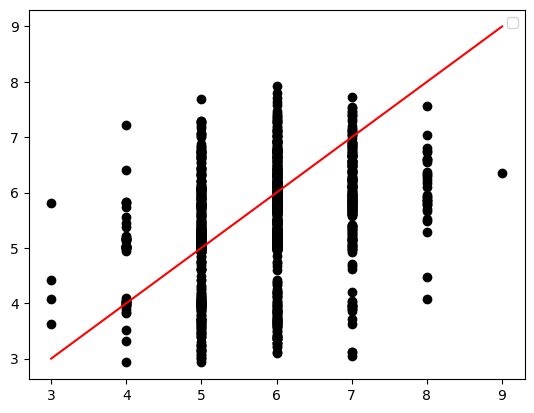

In [163]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error, r2_score

X_test = min_max_scaler.fit_transform(X_test)
y_reg_pred_test = regr.predict(X_test)
# y_clf_pred_test = clf.predict(X_test)


print(X_test)



# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_reg_pred_test))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_reg_pred_test))


plt.scatter(y_test, y_reg_pred_test,  color='black')
# plt.scatter(rand_jitter(y_test), rand_jitter(y_clf_pred_test),  color='blue')
plt.plot([ 3, 4, 5, 6, 7, 8,9], [ 3, 4, 5, 6, 7, 8,9], color='red')
# plt.scatter(X_test, y_test, color='red', label='Test data points')
# plt.plot(y_test, y_pred_test, color='blue', linewidth=1, label='Model')
# plt.scatter(y_test, y_pred_test, marker='x', color='red', linewidth=3)
plt.legend()
plt.show()


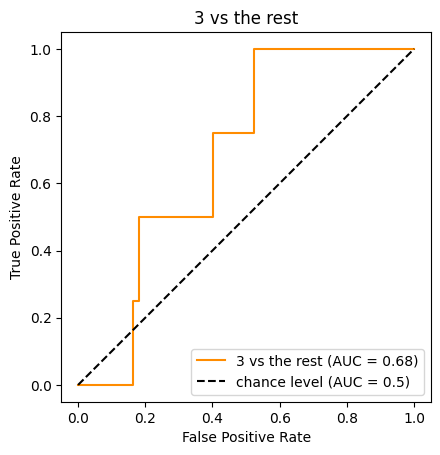

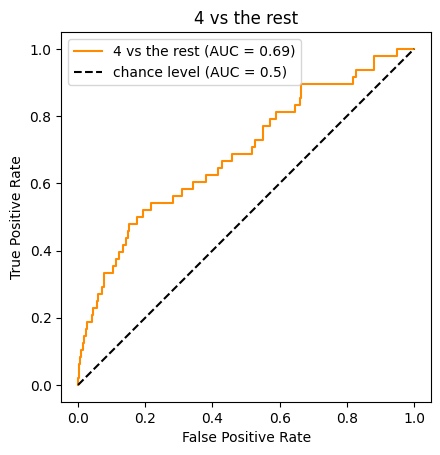

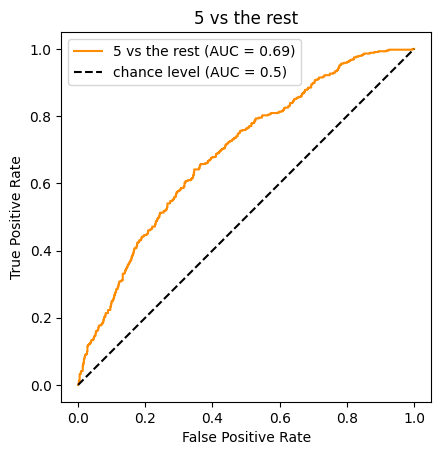

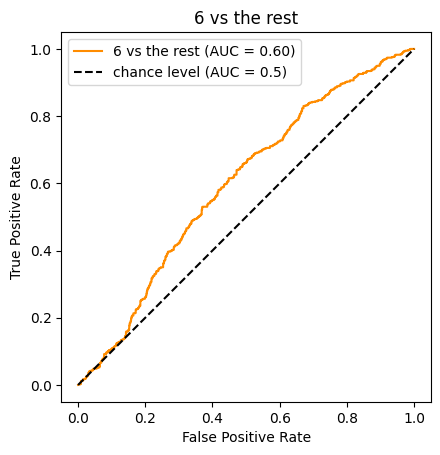

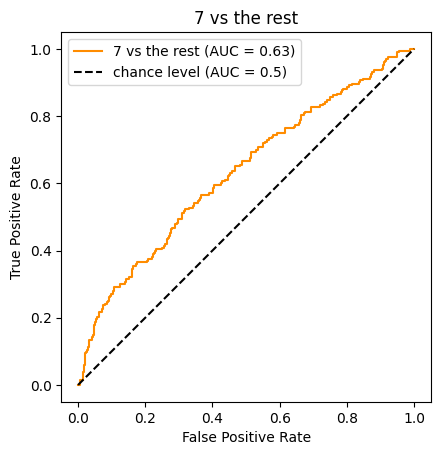

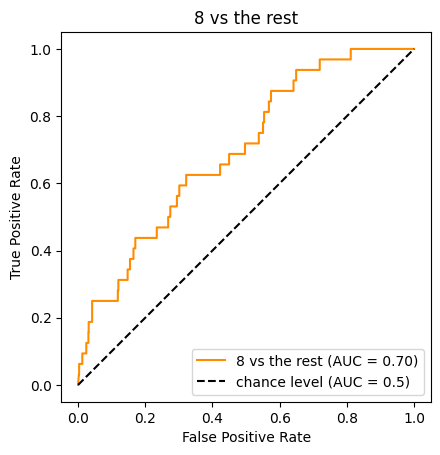

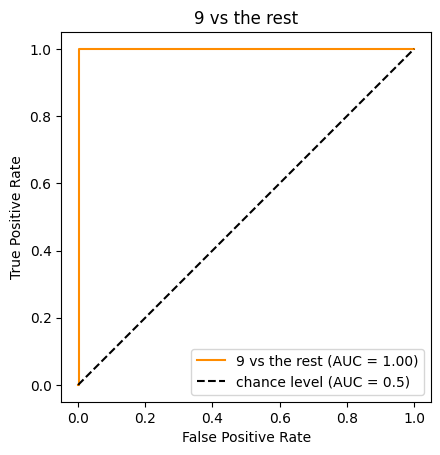

In [164]:

from sklearn.preprocessing import LabelBinarizer

y_score = clf.predict_proba(X_test)

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

for class_of_interest in label_binarizer.classes_:
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    class_id

    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_of_interest} vs the rest",
        color="darkorange",
    )
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{class_of_interest} vs the rest")
    plt.legend()
    plt.show()
